In [21]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [22]:
portfolio = {
  "portfolio": [

    {"symbol": "NVDA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMD", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "META", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "GOOGL", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "TSLA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMZN", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "MSFT", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "FSLY", "totalValue": 1000, "percentageOfPortfolio": 12.5}
  ]
}
# Extract symbols into a list
symbols = [entry["symbol"] for entry in portfolio["portfolio"]]

print(symbols)

['NVDA', 'AMD', 'META', 'GOOGL', 'TSLA', 'AMZN', 'MSFT', 'FSLY']


In [23]:
tickers = symbols

In [24]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  NVDA         AMD        META       GOOGL        TSLA  \
Date                                                                     
2009-02-25    1.834690    2.220000         NaN    8.549550         NaN   
2009-02-26    1.894318    2.090000         NaN    8.437938         NaN   
2009-02-27    1.898904    2.180000         NaN    8.458208         NaN   
2009-03-02    1.738369    2.010000         NaN    8.187187         NaN   
2009-03-03    1.807170    2.070000         NaN    8.145145         NaN   
...                ...         ...         ...         ...         ...   
2024-02-14  739.000000  178.699997  472.778381  145.940002  188.710007   
2024-02-15  726.580017  176.759995  483.516968  142.770004  200.449997   
2024-02-16  726.130005  173.869995  472.818329  140.520004  199.949997   
2024-02-20  694.520020  165.690002  471.250000  141.119995  193.759995   
2024-02-21  674.719971  164.289993  468.029999  142.550003  194.770004   

                  AMZN        MSFT   

In [25]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                NVDA       AMD      META     GOOGL      TSLA      AMZN  \
Date                                                                     
2019-05-20 -0.031013 -0.030272 -0.014021 -0.020853 -0.027236 -0.005381   
2019-05-21  0.021578  0.024802  0.011427  0.008508 -0.001364 -0.000780   
2019-05-22 -0.018617  0.002191  0.002702  0.001221 -0.062110  0.001162   
2019-05-23 -0.032589 -0.039060 -0.024306 -0.009134  0.014219 -0.024055   
2019-05-24 -0.014839  0.003030  0.001050 -0.005893 -0.025175  0.004287   
...              ...       ...       ...       ...       ...       ...   
2024-02-14  0.024270  0.040892  0.028200  0.005497  0.025167  0.013780   
2024-02-15 -0.016949 -0.010916  0.022460 -0.021961  0.060353 -0.006925   
2024-02-16 -0.000620 -0.016485 -0.022375 -0.015885 -0.002498 -0.001709   
2024-02-20 -0.044508 -0.048189 -0.003322  0.004261 -0.031447 -0.014439   
2024-02-21 -0.028923 -0.008485 -0.006856  0.010082  0.005199  0.008997   

                MSFT      FSLY  
Date

In [26]:


# Calculate total portfolio value
portfolio_value = sum(item["totalValue"] for item in portfolio["portfolio"])
print(f"Total Portfolio Value: {portfolio_value} GBP")
weights = np.array([entry["percentageOfPortfolio"] for entry in portfolio["portfolio"]])

# Since weights are in percentages, convert them to fractions by dividing by 100
weights = weights / 100

print(weights)

Total Portfolio Value: 8000 GBP
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [27]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2019-05-20   -0.016568
2019-05-21    0.000216
2019-05-22   -0.009200
2019-05-23   -0.015944
2019-05-24   -0.010316
                ...   
2024-02-14    0.021874
2024-02-15   -0.043275
2024-02-16   -0.012418
2024-02-20   -0.025435
2024-02-21   -0.006103
Length: 1198, dtype: float64


In [28]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2019-07-30    0.080723
2019-07-31    0.061867
2019-08-01    0.038339
2019-08-02    0.032066
2019-08-05    0.017914
                ...   
2024-02-14    0.199288
2024-02-15    0.172849
2024-02-16    0.156200
2024-02-20    0.142641
2024-02-21    0.108131
Length: 1149, dtype: float64


In [29]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

2763.5347239606845


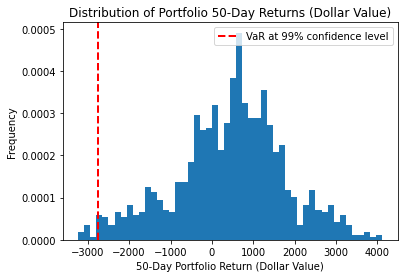

In [30]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns = range_returns * portfolio_value

import matplotlib.pyplot as plt
plt.hist(range_returns.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()